# Titanic Survival Prediction

# Overview

## Problem Definition

We are going to create a machine learning model that predicts if a passenger survived the sinking of the Titanic or not, given details such as a passenger's Ticket Class, Age, Fare, etc. So this is a **Binary Classification** problem, i.e, we need our model to predict whether a passenger survived the sinking of the Titanic or not.

## Data

The Dataset is taken from Kaggle Competition: https://www.kaggle.com/c/titanic

Data Dictionary:

* **Variable Definition	Key**
* survival - Survival 0 = No, 1 = Yes
* pclass - Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex - Sex	
* Age - Age in years	
* sibsp - # of siblings / spouses aboard the Titanic	
* parch - # of parents / children aboard the Titanic	
* ticket - Ticket number	
* fare - Passenger fare	
* cabin - Cabin number	
* embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Evaluation

To predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, the model must predict a 0 or 1 value for the variable. And we are going to evaluate on the basis of how it scores on Test Set (**Accuracy**)

# EDA - Exploratory Data Analysis

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing our dataset

train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Dataset Dimensions

print(f"No. of Rows and Columns of Training Set: {train_df.shape}")
print(f"No. of Rows and Columns of Test Set: {test_df.shape}")

No. of Rows and Columns of Training Set: (891, 12)
No. of Rows and Columns of Test Set: (418, 11)


In [5]:
# Moving "Survived" Column to the end

# cols = [col for col in train_df.columns if col != "Survived"]
# cols.append("Survived")
# # cols

# train_df = train_df[cols]
# train_df.head()

In [6]:
# Dataset Information

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
# Quick Summary of Numerical Stats

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Numerical Columns and Categorical Columns

# train_df.describe().columns
num_cols = train_df.select_dtypes(include=np.number)
cat_cols = train_df.select_dtypes(exclude=np.number)

print(f"Numerical Columns: {num_cols.columns}")
print(f"Non Numerical Columns: {num_cols.columns}")

Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Non Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [10]:
# A quick check to see if columns are not overlapped
# Total no. of columns should be 12

len(num_cols.columns) + len(cat_cols.columns)

12

In [11]:
# Checking Null Values

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have Null values in **`Age`, `Cabin`, `Embarked`**

In [12]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have Null Values in **`Age`, `Fare`, `Cabin`**

In [13]:
# No. of Males and Females present on the ship, and their survival rates

males = len(train_df["Sex"][train_df["Sex"] == 'male'])
females = len(train_df["Sex"][train_df["Sex"] == 'female'])

males_survived = len(train_df[(train_df["Sex"] == 'male') & (train_df["Survived"] == 1)]["Sex"]) 
females_survived = len(train_df[(train_df["Sex"] == 'female') & (train_df["Survived"] == 1)]["Sex"]) 

print(f"No. of Males present on the ship: {males} out of which {males_survived} survived.")
print(f"No. of Females present on the ship: {females} out of which {females_survived} survived.")

print(f"Survival Rate of Males: {males_survived/males * 100:.2f}%")
print(f"Survival Rate of Females: {females_survived/females * 100:.2f}%")

No. of Males present on the ship: 577 out of which 109 survived.
No. of Females present on the ship: 314 out of which 233 survived.
Survival Rate of Males: 18.89%
Survival Rate of Females: 74.20%


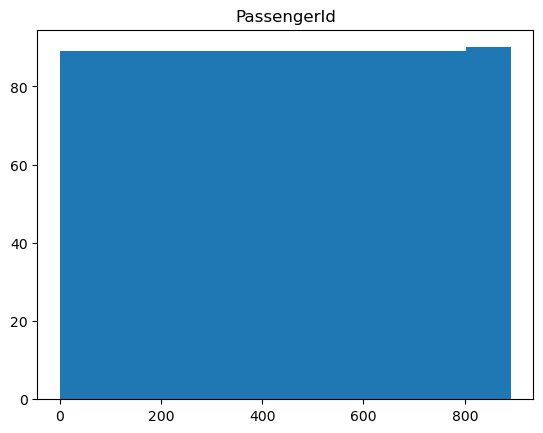

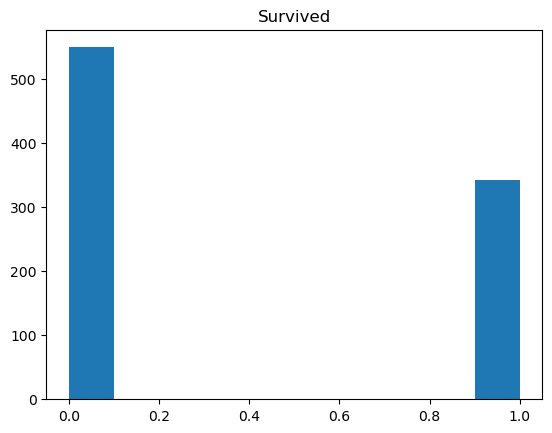

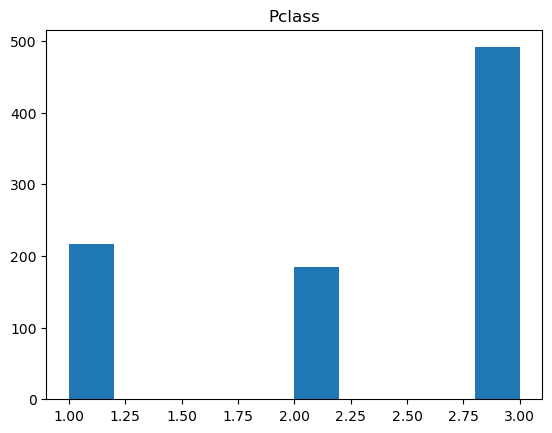

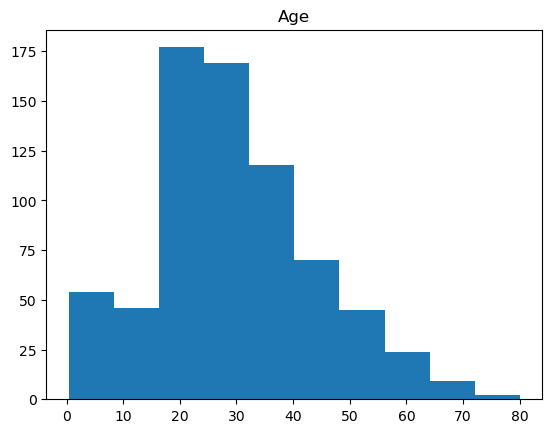

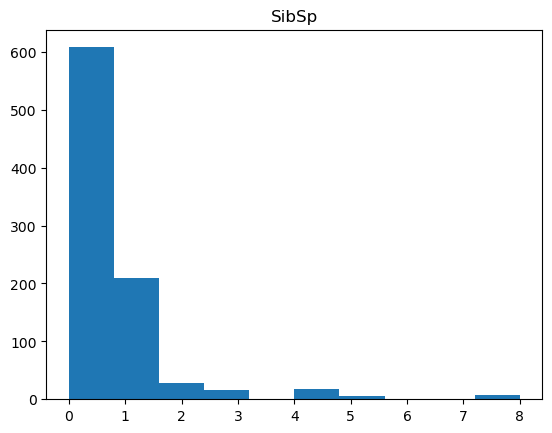

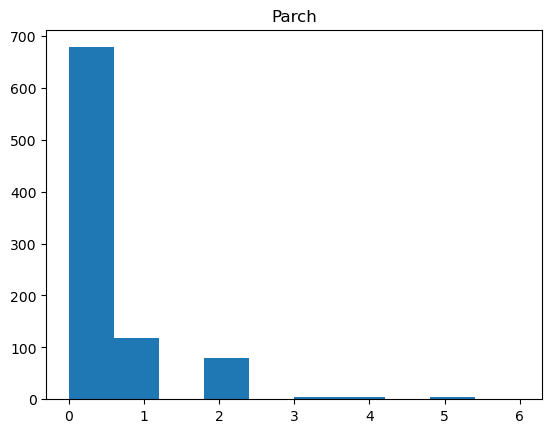

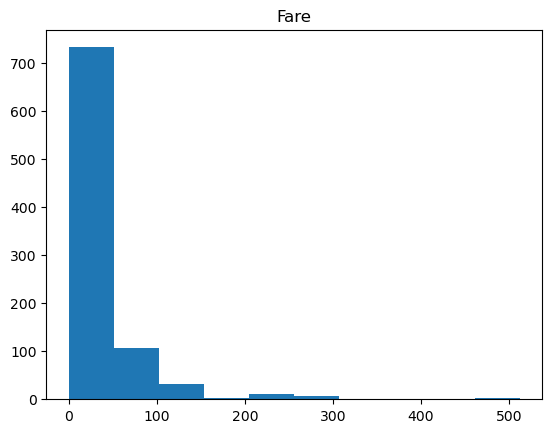

In [14]:
# Histogram Graph to view distribution of all the Numerical Columns

for i in num_cols.columns:
    plt.hist(train_df[i])
    plt.title(i)
    plt.show()

**We can infer that**

* Most of the passengers had 3rd class ticket.
* Most of the passengers were travelling alone (No siblings/parents).
* Most pasengers bought the affordable tickets.
* `Age` is somewhat normally distributed.
* `SibSp`, `Parch`, `Fare` are right skewed.

Survived
0    549
1    342
Name: count, dtype: int64


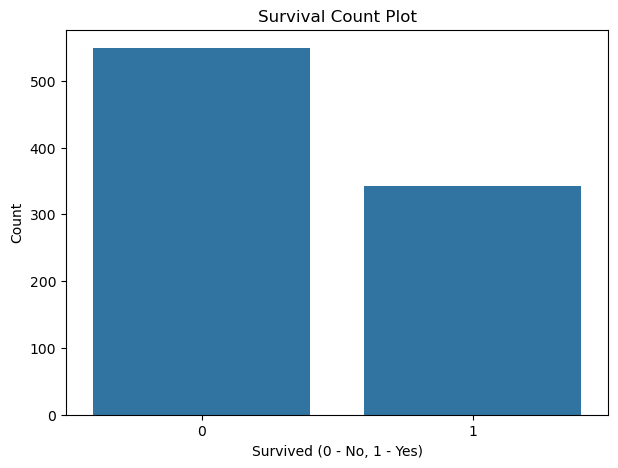

In [15]:
# A graph to visualize how many people survived

print(train_df["Survived"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(data=train_df, x="Survived")
plt.xlabel("Survived (0 - No, 1 - Yes)")
plt.ylabel("Count")
plt.title("Survival Count Plot")
plt.show()

In [16]:
# Tabular View

pd.crosstab(train_df["Sex"], train_df["Survived"])
# print(train_df.groupby("Sex")["Survived"].sum())

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
# Let's see a quick pivot table between Survived and few of the Numerical Columns

pd.pivot_table(data=train_df, index="Survived", values=["Age", "SibSp", "Parch", "Fare", "Pclass"])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


In [18]:
# Now let's check how different classes affected the odds of survival

# pd.pivot_table(data=train_df, index="Survived", columns="Pclass", values="PassengerId", aggfunc="count")
pd.crosstab(train_df["Survived"], train_df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [19]:
# Same for Embarked

pd.crosstab(train_df["Survived"], train_df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [20]:
# For SibSp

pd.crosstab(train_df["Survived"], train_df["SibSp"])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [21]:
# For Parch

pd.crosstab(train_df["Survived"], train_df["Parch"])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


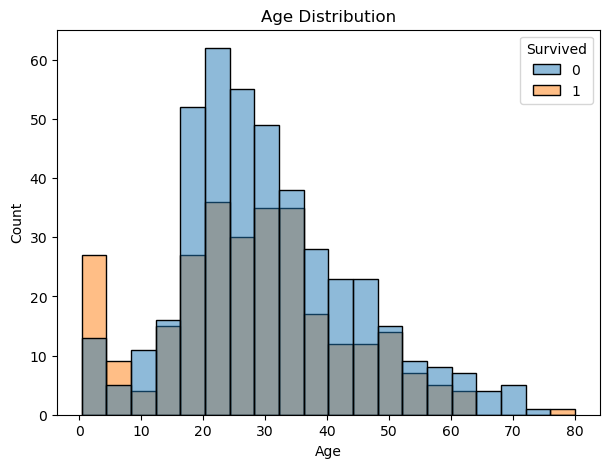

In [22]:
# Histogram graph of Age Distribution

# plt.hist(train_df["Age"])
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.show()

plt.figure(figsize=(7,5))
sns.histplot(data=train_df, x="Age", hue="Survived")
plt.title("Age Distribution")
plt.show()

We can infer from the histogram plot that children (Age in between 0-10) survived more, Adults survived less, Seniors survived least.

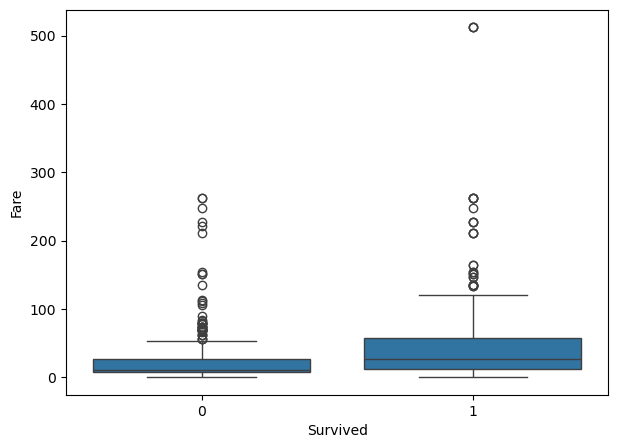

In [23]:
# Fare v/s Survival Graph

plt.figure(figsize=(7,5))
sns.boxplot(data=train_df, x="Survived", y="Fare")
plt.show()

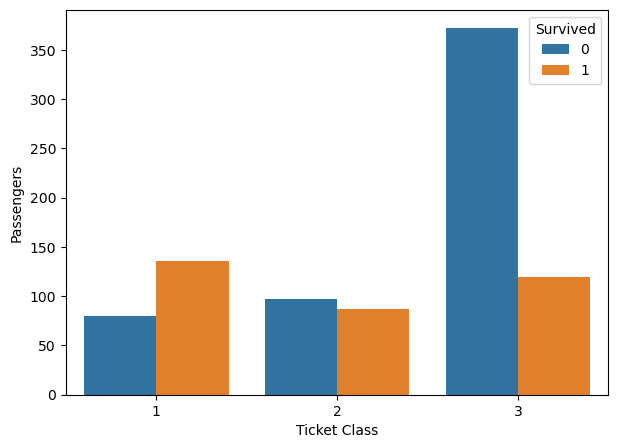

In [24]:
# A graph between Ticket Class and Age

plt.figure(figsize=(7,5))
sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.ylabel("Passengers")
plt.xlabel("Ticket Class")
plt.show()

We can see the most passengers who bought the higher class tickets **(1st and 2nd)** had better odds at surviving, and by a big margin.

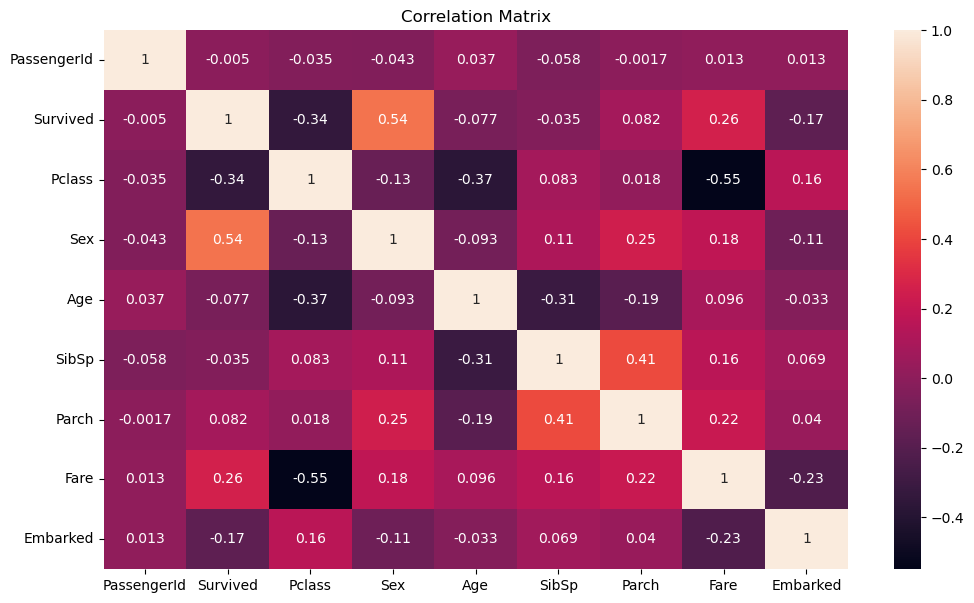

In [25]:
# A Correlation Matrix

df_corr = train_df.copy()
df_corr["Sex"] = df_corr["Sex"].map({"male" : 0, "female" : 1}) # encoding gender
df_corr["Embarked"] = df_corr["Embarked"].map({"C" : 0, "Q" : 1, "S" : 2}) # encoding Port of Embarktion

corr_matrix = df_corr.corr(numeric_only=True)

plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

We can infer from the correlation matrix that `Sex, PClass, Fare, Embarked` features have a greater impact on a passenger's odds of Survival.

**NOTE**: Categorical features such as `Name, Cabin` are not encoded yet into the Correlation Matrix.

# Feature Engineering and Preprocessing

We cannot use **OneHotEncoder** on `Name` as it will create many dummy columns.
So we will have to extract the **Name_titles** from it

In [26]:
# Extracting titles

train_df["Name_title"] = train_df["Name"].apply(lambda x : x.split(',')[1].split('.')[0].strip()) # since name, title., name
train_df["Name_title"].value_counts()

Name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

We can see that there are many rare titles, that has a very low value count. So we will put them into a single category called "rare".

In [27]:
# For Training Set

title_counts = train_df["Name_title"].value_counts()
rare_titles = title_counts[title_counts < 15].index

train_df["Name_title"] = train_df["Name_title"].replace(to_replace=rare_titles, value="rare")
train_df["Name_title"].value_counts()

Name_title
Mr        517
Miss      182
Mrs       125
Master     40
rare       27
Name: count, dtype: int64

In [28]:
# For Test Set

test_df["Name_title"] = test_df["Name"].apply(lambda x : x.split(',')[1].split('.')[0].strip())
title_counts = test_df["Name_title"].value_counts()
rare_titles = title_counts[title_counts < 15].index

test_df["Name_title"] = test_df["Name_title"].replace(to_replace=rare_titles, value="rare")
test_df["Name_title"].value_counts()

Name_title
Mr        240
Miss       78
Mrs        72
Master     21
rare        7
Name: count, dtype: int64

Before we proceed, let's drop all the irrelevant columns.

In [29]:
train_df = train_df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

Now let's fix our columns having Null Values.

In [30]:
train_df.isna().sum(), test_df.isna().sum()

(Survived        0
 Pclass          0
 Sex             0
 Age           177
 SibSp           0
 Parch           0
 Fare            0
 Embarked        2
 Name_title      0
 dtype: int64,
 Pclass         0
 Sex            0
 Age           86
 SibSp          0
 Parch          0
 Fare           1
 Embarked       0
 Name_title     0
 dtype: int64)

In [31]:
age_median = train_df["Age"].median()
embarked_mode = train_df["Embarked"].mode()[0]
fare_median = train_df["Fare"].median()

train_df["Age"] = train_df["Age"].fillna(age_median)
test_df["Age"] = test_df["Age"].fillna(age_median)

train_df["Embarked"] = train_df["Embarked"].fillna(embarked_mode)

test_df["Fare"] = test_df["Fare"].fillna(fare_median)

train_df.isna().sum(), test_df.isna().sum()

(Survived      0
 Pclass        0
 Sex           0
 Age           0
 SibSp         0
 Parch         0
 Fare          0
 Embarked      0
 Name_title    0
 dtype: int64,
 Pclass        0
 Sex           0
 Age           0
 SibSp         0
 Parch         0
 Fare          0
 Embarked      0
 Name_title    0
 dtype: int64)

In [32]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Name_title  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null   

(None, None)

In [33]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_encoded = pd.get_dummies(X)
test_df_encoded = pd.get_dummies(test_df)

In [34]:
X_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,Name_title_rare
0,3,22.0,1,0,7.2500,False,True,False,False,True,False,False,True,False,False
1,1,38.0,1,0,71.2833,True,False,True,False,False,False,False,False,True,False
2,3,26.0,0,0,7.9250,True,False,False,False,True,False,True,False,False,False
3,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,False,True,False
4,3,35.0,0,0,8.0500,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True,False,False,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True,False,True,False,False,False
888,3,28.0,1,2,23.4500,True,False,False,False,True,False,True,False,False,False
889,1,26.0,0,0,30.0000,False,True,True,False,False,False,False,True,False,False


In [35]:
test_df_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,Name_title_rare
0,3,34.5,0,0,7.8292,False,True,False,True,False,False,False,True,False,False
1,3,47.0,1,0,7.0000,True,False,False,False,True,False,False,False,True,False
2,2,62.0,0,0,9.6875,False,True,False,True,False,False,False,True,False,False
3,3,27.0,0,0,8.6625,False,True,False,False,True,False,False,True,False,False
4,3,22.0,1,1,12.2875,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,False,True,False,False,True,False,False,True,False,False
414,1,39.0,0,0,108.9000,True,False,True,False,False,False,False,False,False,True
415,3,38.5,0,0,7.2500,False,True,False,False,True,False,False,True,False,False
416,3,28.0,0,0,8.0500,False,True,False,False,True,False,False,True,False,False


# Modelling

Now that we have decided which features to choose and preprocessed our data, we can move forward with modelling.

## Baseline Scores (Models are not tuned)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

model_rfc = RandomForestClassifier()
model_lr = LogisticRegression(max_iter=1000)
model_knn = KNeighborsClassifier()
model_xgb = XGBClassifier()

def model_eval(model, X, y):
    '''
    A quick function to evaluate a model's
    performance
    '''
    cvs_score = cross_val_score(model, X, y, n_jobs=-1)
    print(f"{model} scored = {cvs_score.mean()*100:.2f}%")

In [43]:
# Checking our models' performance (Not Tuned)

np.random.seed(42)

model_eval(model_rfc, X_encoded, y)
model_eval(model_lr, X_encoded, y)
model_eval(model_knn, X_encoded, y)
model_eval(model_xgb, X_encoded, y)

RandomForestClassifier() scored = 80.14%
LogisticRegression(max_iter=1000) scored = 82.60%
KNeighborsClassifier() scored = 72.39%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) scored = 82.04%


**Observation:**

Baseline Model Scores are,
* RandomForestClassifier = **80.14%**
* LogisticRegression = **82.60%** (Highest)
* KNN = **72.39%**
* XGB = **82.40%**

Since our KNN model performed so low, we are not going use it for hyperparameter tuning.

## Hyperparameter Tuning

In [51]:
# Now let's tune our models and see if we can improve the scores

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating parameters grid

lr_grid = {
    "max_iter" : [1000],
    "C": [0.01, 0.1, 1, 10, 100],            
    "penalty": ["l2"],                      
    "class_weight": [None, "balanced"]
}

rfc_grid = {
    "n_estimators": [100, 200, 500, 800],
    "max_depth": [None, 4, 6, 8, 12],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.6, 0.8],
    "bootstrap": [True, False]
}

xgb_grid = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.6, 0.75, 0.85, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "reg_lambda": [0.5, 1, 2, 5]
}

In [56]:
np.random.seed(42)

grid_lr = GridSearchCV(estimator=model_lr , param_grid=lr_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_lr.fit(X_encoded, y) 
print("Best LR Model:", grid_lr.best_params_, grid_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LR Model: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2'} 0.8260372857949909


In [57]:
np.random.seed(42)

grid_rfc = GridSearchCV(estimator=model_rfc , param_grid=rfc_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_rfc.fit(X_encoded, y) 
print("Best Random Forest Model:", grid_rfc.best_params_, grid_rfc.best_score_)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Random Forest Model: {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500} 0.8518548741447493


In [60]:
np.random.seed(42)

random_xgb = RandomizedSearchCV( estimator=model_xgb, n_iter=20, param_distributions=xgb_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
random_xgb.fit(X_encoded, y) 
print("Best XGBoost Model:", random_xgb.best_params_, random_xgb.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Model: {'subsample': 0.6, 'reg_lambda': 1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0} 0.8406377502981608


**Observations**

After hyperparameter tuning, the results are
* LogisticRegression = **82.60%**
* RandomForest = **85.18%** (Best)
* XGBoost = **84.06%**.

Hyperparameters are (Saving it for later)

* LogisticRegression = {'C': 10, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2'}
* RandomForest = {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
* XGBoost = {'subsample': 0.6, 'reg_lambda': 1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}

## Model Fitting

Now that we have found our best hyperparameter, we can use it to train our models.

In [63]:
model_lr = LogisticRegression(C=10, class_weight=None, max_iter=1000, penalty='l2')
model_rfc = RandomForestClassifier(bootstrap=True, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=10, n_estimators=500)
model_xgb = XGBClassifier(subsample=0.6, reg_lambda=1, n_estimators=100, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=1.0)

model_lr.fit(X_encoded, y)
model_rfc.fit(X_encoded, y)
model_xgb.fit(X_encoded, y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
# Storing our predictions

preds_lr = model_lr.predict(test_df_encoded)
preds_rfc = model_rfc.predict(test_df_encoded)
preds_xgb = model_xgb.predict(test_df_encoded)

In [66]:
# Saving our predictions for submission

test_df = pd.read_csv("data/test.csv") # reloaded for column name extraction

sub_lr = pd.DataFrame()
sub_rcf = pd.DataFrame()
sub_xgb = pd.DataFrame()

sub_lr["PassengerId"] = test_df["PassengerId"]
sub_rcf["PassengerId"] = test_df["PassengerId"]
sub_xgb["PassengerId"] = test_df["PassengerId"]

sub_lr["Survived"] = preds_lr
sub_rcf["Survived"] = preds_rfc
sub_xgb["Survived"] = preds_xgb

sub_lr.to_csv("./submission_lr.csv", index=False)
sub_rcf.to_csv("./submission_rfc.csv", index=False)
sub_xgb.to_csv("./submission_xgb.csv", index=False)